# Imports

Standard imports including numpy, pandas, matplotlib (seaborn) and scikit learn.

In [45]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy import stats



In [46]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd. read_csv('/kaggle/input/titanic/test.csv')

# Data Investigation

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [48]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [49]:
train.head(25)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## **Class Imbalance**
Immediately can identify that there is class imbalance, although not by much. With the dataset being so small already we should rule out the (although convenient) under-sampling route and see if there is a convenient way to handle the problem.

## **Null values**
We can see that there are several columns with null values which need to be dealt with, the Cabin column in particular has many null values and may need to be dropped altogether, however there may be a possible solution.

## **Columns to Drop**
The Ticket column seems largely of little use to us there isn't much easily extractable information, while the Cabin column also seems largely useless as it is mostly null values, we may be able to find a pattern between the non-null values and survival rate.


In [50]:
# Dropping Columns
train = train.drop(columns=['Ticket'])
test = test.drop(columns=['Ticket'])

## Dealing with null values

In [51]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [52]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [53]:
age_na = train[train['Age'].isna()]
age_na['Pclass'].value_counts()

3    136
1     30
2     11
Name: Pclass, dtype: int64

In [54]:
age_means = {}
age_means[1] = round(train[train['Pclass'] == 1]['Age'].mean())
age_means[2] = round(train[train['Pclass'] == 2]['Age'].mean())
age_means[3] = round(train[train['Pclass'] == 3]['Age'].mean())
age_means

{1: 38, 2: 30, 3: 25}

Since there was a large difference in the class distribution of passengers with NaN age values, and there is a relatively large difference in the mean age of passengers of each class. We decided to fill each NaN value with the mean of the passengers class type.

In [55]:
train['Age'] = train.apply(
    lambda row: age_means[row['Pclass']] if np.isnan(row['Age']) else row['Age'],
    axis=1
)

test['Age'] = test.apply(
    lambda row: age_means[row['Pclass']] if np.isnan(row['Age']) else row['Age'],
    axis=1
)

In [56]:
test[test['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,NaN,NaN,S


In [57]:
train[train['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,30.0,0,0,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,30.0,0,0,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,30.0,0,0,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,30.0,0,0,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,38.0,0,0,0.0,NaN,S


In [58]:
test[test['Fare'] == 0]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
266,1158,1,"Chisholm, Mr. Roderick Robert Crispin",male,38.0,0,0,0.0,NaN,S
372,1264,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,0.0,B52 B54 B56,S


There are two problems with our fare values, we see that in our test set there is a null fare value. While in both our test and train sets we see that there are fare values of 0 which we will treat as null values (since it is safe to say no one boarded the ship for free).

In [59]:
# Filling in the null fare value with the median fare for 3rd class
median_third_class = test[test['Pclass']==3]['Fare'].median()
test['Fare'] = test['Fare'].fillna(median_third_class)

In [60]:
# Defining a function that will find the median fare for the desired PClass as we itterate through both the train and test sets
def train_fare(row):
    fares = {1: train[train['Pclass'] == 1].median(),
             2: train[train['Pclass'] == 2].median(),
             3: train[train['Pclass'] == 3].median()}
    return(fares[row['Pclass']])

def test_fare(row):
    fares = {1: test[test['Pclass'] == 1].median(),
             2: test[test['Pclass'] == 2].median(),
             3: test[test['Pclass'] == 3].median()}
    return(fares[row['Pclass']])

In [61]:
medians = train[train['Fare'] == 0].apply(train_fare, axis=1)['Fare']
medians_test = test[test['Fare'] == 0].apply(test_fare, axis=1)['Fare']
train.loc[train['Fare'] == 0,'Fare'] = medians
test.loc[test['Fare'] == 0,'Fare'] = medians_test

In [62]:
# Changing Cabin to a binary column based on if value is null or not
train.loc[train['Cabin'].notnull(),'Cabin'] = 1
train.loc[train['Cabin'].isnull(),'Cabin'] = 0
train['Cabin'] = train['Cabin'].astype('int')

test.loc[test['Cabin'].notnull(),'Cabin'] = 1
test.loc[test['Cabin'].isnull(),'Cabin'] = 0
test['Cabin'] = test['Cabin'].astype('int')

In [63]:
train[train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,1,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,1,NaN


In [64]:
train.groupby(['Pclass','Embarked']).count()

PassengerId  Survived  Name  Sex  Age  SibSp  Parch  Fare  \
Pclass Embarked                                                              
1      C                  85        85    85   85   85     85     85    85   
       Q                   2         2     2    2    2      2      2     2   
       S                 127       127   127  127  127    127    127   127   
2      C                  17        17    17   17   17     17     17    17   
       Q                   3         3     3    3    3      3      3     3   
       S                 164       164   164  164  164    164    164   164   
3      C                  66        66    66   66   66     66     66    66   
       Q                  72        72    72   72   72     72     72    72   
       S                 353       353   353  353  353    353    353   353   

                 Cabin  
Pclass Embarked         
1      C            85  
       Q             2  
       S           127  
2      C            17  
       Q             3  
       S           164  
3      C            66  
       Q            72  
       S           353

In [65]:
# Most first class passengers embarked from Southampton so we will fill the missing embarked values in the Train set with 'S'

train['Embarked'] = train['Embarked'].fillna('S')

## Feature Engineering

With all our null values dealt with we can move towards converting certain columns to categorical ones and creating some features that maybe more useful to our model

In [66]:
# Changing Pclass and Embarked to categorical using One-hot encoding
train[['Pclass', 'Embarked']]= train[['Pclass', 'Embarked']].astype('category')
test[['Pclass', 'Embarked']] = test[['Pclass', 'Embarked']].astype('category')

dummy_class_train = pd.get_dummies(train['Pclass'])
dummy_class_test = pd.get_dummies(test['Pclass'])
train = pd.concat([train, dummy_class_train], axis=1)
test = pd.concat([test, dummy_class_test], axis=1)


dummy_emb_train = pd.get_dummies(train['Embarked'])
dummy_emb_test = pd.get_dummies(test['Embarked'])
train = pd.concat([train, dummy_emb_train], axis=1)
test = pd.concat([test, dummy_emb_test], axis=1)

# Changing Sex to a binary column
train['Sex'] = train['Sex'].apply(lambda x: 1 if x=='male' else 0)
test['Sex'] = test['Sex'].apply(lambda x: 1 if x=='male' else 0)


In [67]:
# Extracting titles from names
train['Title'] = train['Name'].str.extract(r',\s(.+?)\.')
test['Title'] = test['Name'].str.extract(r',\s(.+?)\.')

In [68]:
train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Sir               1
Ms                1
Capt              1
Don               1
Lady              1
Jonkheer          1
the Countess      1
Mme               1
Name: Title, dtype: int64

In [69]:
# Renaming rare titles as "Rare", making Title column categorical
common_titles = ['Mr', 'Miss', 'Mrs', 'Master']
train.loc[~train["Title"].isin(common_titles), "Title"] = "Rare"
test.loc[~test["Title"].isin(common_titles), "Title"] = "Rare"

train['Title'] = train['Title'].astype('category')
test['Title'] = test['Title'].astype('category')

dummy_title_train = pd.get_dummies(train['Title'])
dummy_title_test = pd.get_dummies(test['Title'])
train = pd.concat([train, dummy_title_train], axis=1)
test = pd.concat([test, dummy_title_test], axis=1)


# Data visualization



In [70]:
numerical_train = train.select_dtypes(exclude = ['object'])
corr_mat = numerical_train.corr()


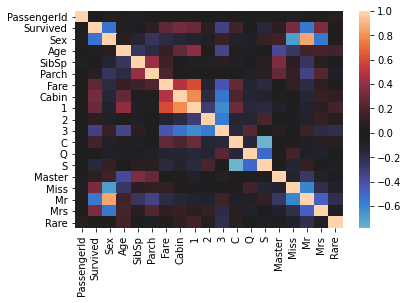

In [71]:
sns.heatmap(corr_mat, center = 0)

4.788357022826381

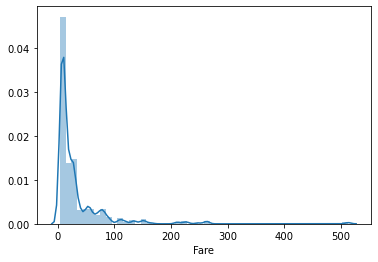

In [72]:
g = sns.distplot(train['Fare'])
train['Fare'].skew()

3.6836037156936285

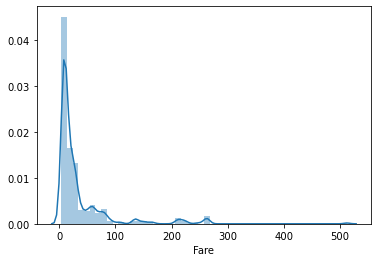

In [73]:
g = sns.distplot(test['Fare'])
test['Fare'].skew()

There is a clear skew within the fare column which may affect our model, we will need to perform some sort of transform to normalize the data

0.21726124616778286

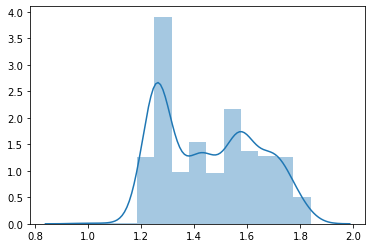

In [74]:
# Comparing log transform and box-cox transform to fix skew

box_cox = stats.boxcox(train['Fare'])[0]
g = sns.distplot(box_cox)
pd.Series(box_cox).skew()

0.8959542378995908

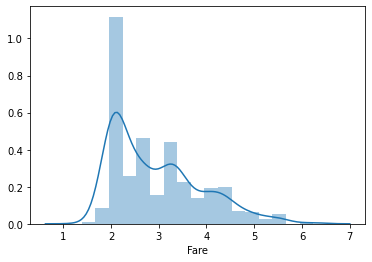

In [75]:
log_fare = train['Fare'].apply(lambda x:np.log(x))
g = sns.distplot(log_fare)
log_fare.skew()

In [76]:
# With the box-cox transform clearly fixing the skew best we will use it to fix our fare column
train['box_fare'] = box_cox

0.21597907070080266

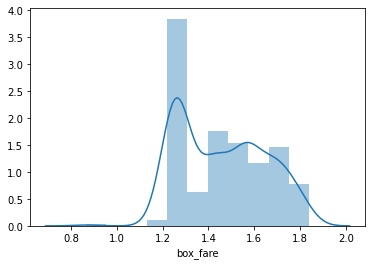

In [77]:
test['box_fare'] = stats.boxcox(test['Fare'])[0]
g = sns.distplot(test['box_fare'])
test['box_fare'].skew()

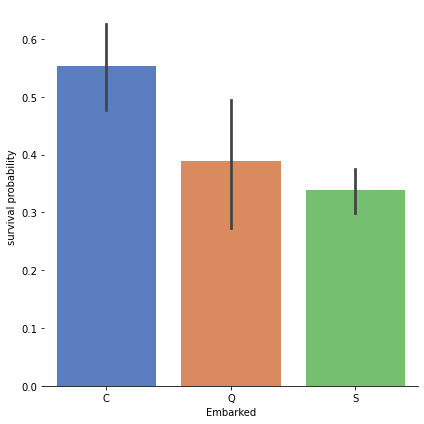

In [78]:
g = sns.catplot(x="Embarked", y="Survived", data=train,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

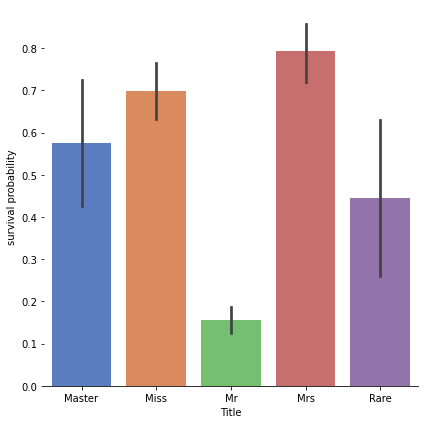

In [79]:
g = sns.catplot(x="Title", y="Survived",data=train,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

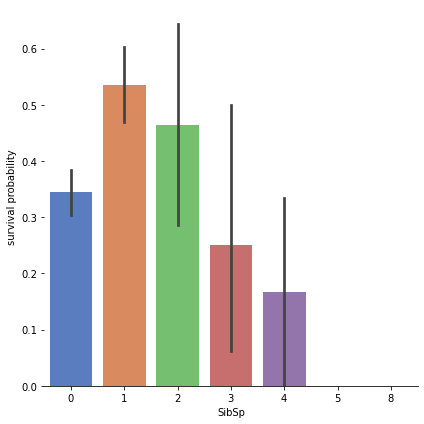

In [80]:
g = sns.catplot(x="SibSp", y="Survived",data=train,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")
    

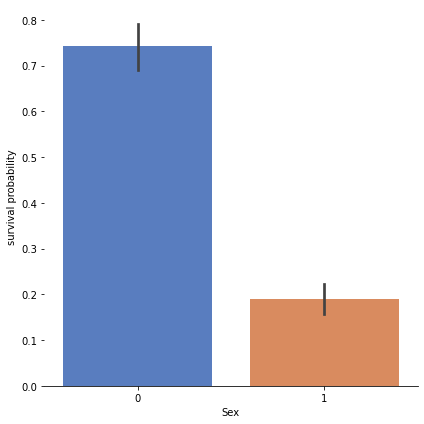

In [81]:
g = sns.catplot(x="Sex", y="Survived",data=train,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

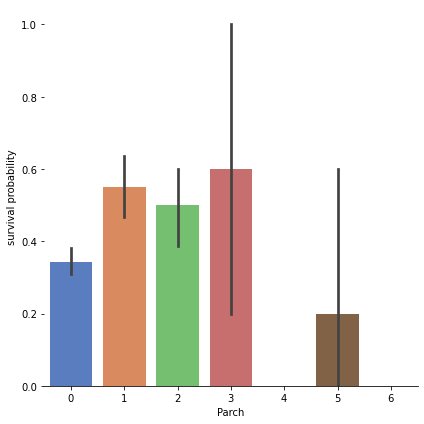

In [82]:
g = sns.catplot(x="Parch", y="Survived",data=train,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")   

Several observations can be made after visualizing the categorical data, as well as columns with discrete data such as the SibSp and Parch columns.

* The distribution of fares is significantly right skewed, thus transformation was necessary
* People who embarked from Cherbourg had a higher survival rate than those embarking from Queenstown or Southampton
* Adult men with no special title had a very low survival rate compared to women and children
* Those with 1-2 Siblings+Spouses had a higher survival rate than those with many or those with none
* There wasn't a clear trend seen in the Parch column however those with more than 3 Parents and children saw very low survival rates.



# Fitting the Model

Time to try several different models, I will be trying a simpe logistic regression, a random forest, and MLP Classifer, as well as XGBoost

In [83]:
features = train.columns
features = features.drop(['PassengerId','Survived', 'Pclass', 'Title', 'Fare', 'Name', 'Embarked'])

In [84]:
train[features].head()

,Sex,Age,SibSp,Parch,Cabin,1,2,3,C,Q,S,Master,Miss,Mr,Mrs,Rare,box_fare
0,1,22.0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1.233331
1,0,38.0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,1.706212
2,0,26.0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1.264182
3,0,35.0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1.672060
4,1,35.0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1.269459


In [85]:
# Defining pipeline
def random_search(model, parameter_grid, cvn, train_data, feature_list):
    clf = RandomizedSearchCV(estimator = model, param_distributions = parameter_grid, cv=cvn, return_train_score = False, n_jobs = -1)
    clf.fit(train_data[feature_list], train_data['Survived'])
    return clf

def grid_search(model, parameter_grid, cvn, train_data, feature_list):
    clf = GridSearchCV(estimator = model, param_grid= parameter_grid, cv=cvn, return_train_score = False, n_jobs = -1)
    clf.fit(train_data[feature_list], train_data['Survived'])
    return clf

def create_predictions(model, train_data,test_data, features, csv_name):
    model.fit(train_data[features], train_data['Survived'])
    predictions = model.predict(test_data[features])
    submission = pd.concat([test_data['PassengerId'], pd.Series(predictions)], axis=1)
    submission = submission.rename(columns = {0:'Survived'})
    submission.to_csv("./" + csv_name, index=False)
    

In [86]:
param_grid_rf = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

param_grid_logit = {'penalty': ['l1', 'l2'],
                    'solver' : ['lbfgs', 'liblinear']    
}

param_grid_xgb = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }



In [87]:
rf = RandomForestClassifier(random_state = 123)
lr = LogisticRegression(random_state=123)
clf = xgb.XGBClassifier(random_state=123)

In [89]:
rf_opt = random_search(rf, param_grid_rf, 4, train, features)
best_rf_params = rf_opt.best_params_

In [90]:
create_predictions(rf_opt, train, test, features, "rf_opt.csv")

In [91]:
rf_opt.fit(train[features], train['Survived'])
predictions_rf = rf_opt.predict(train[features])

rf_accuracy = accuracy_score(train['Survived'], predictions_rf)

In [92]:
lr_opt = grid_search(lr, param_grid_logit, 4, train, features)

In [93]:
lr_opt.fit(train[features], train['Survived'])

GridSearchCV(cv=4, estimator=LogisticRegression(random_state=123), n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear']})

In [94]:
lr_opt.best_params_

{'penalty': 'l2', 'solver': 'liblinear'}

In [95]:
lr_predictions = lr_opt.predict(train[features])
lr_accuracy = accuracy_score(train['Survived'], lr_predictions)

In [96]:
lr_accuracy

0.8395061728395061

In [97]:
create_predictions(lr_opt, train, test, features, "lr_opt.csv")

In [98]:
xgb_opt = random_search(clf, param_grid_xgb, 4, train, features)

In [99]:
xgb_opt.fit(train[features], train['Survived'])

RandomizedSearchCV(cv=4,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           num_parallel_tree=None,
                                           random_state=123, reg_alpha=None,
                                     

In [100]:
xgb_params = xgb_opt.best_params_

In [101]:
xgb_predictions = xgb_opt.predict(train[features])
xgb_accuracy= accuracy_score(train['Survived'], xgb_predictions)


In [102]:
xgb_opt = xgb.XGBClassifier(**xgb_params, random_state = 123)

In [103]:
create_predictions(xgb_opt, train, test, features, "xgb_opt.csv")